# REAL TIME EMOTION RECOGNITION 

**In this project,**

**step 1:** We will take input from the webcam of the PC as several frames using openCV 


**step 2:** Each frame taken from the webcam would be analyzed to extract dominant expression using DeepFace

**step 3:** NOW, using haarcascade classifier we will detect the face location and draw a square around it

**Step 4:** then to visually see these things using cv2.imshow() function we will visually show the camera output

--------------------------------------------------------------------------------------

# Importing libraries and loading images

In [1]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('scared.jpeg')

# this image is in BGR scale 

In [3]:
#  converting the picture into RGB frame and
#  storing into another variable

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

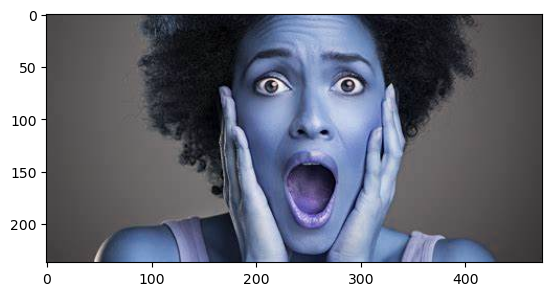

In [4]:
# displaying both images

plt.imshow(img)

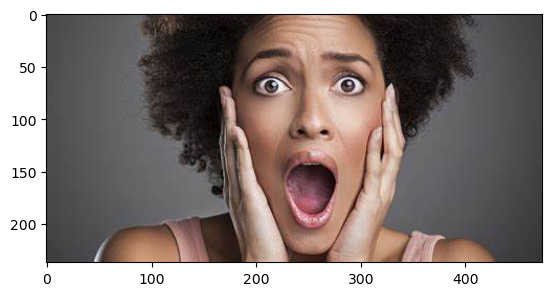

In [5]:
plt.imshow(img_rgb)

# emotion detection method

In [6]:
# predicting the emotion of the child in the image

predictions = DeepFace.analyze(img_rgb,enforce_detection = False)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.02it/s]


In [7]:
predictions

[{'emotion': {'angry': 3.633488809670193e-06,
   'disgust': 4.9532013867296425e-14,
   'fear': 94.2706651364964,
   'happy': 2.9524684730176792e-09,
   'sad': 0.0049782048768035846,
   'surprise': 5.7243489355624995,
   'neutral': 1.0609362123080075e-07},
  'dominant_emotion': 'fear',
  'region': {'x': 181, 'y': 7, 'w': 152, 'h': 152},
  'age': 25,
  'gender': {'Woman': 0.10874184081330895, 'Man': 99.89125728607178},
  'dominant_gender': 'Man',
  'race': {'asian': 3.01193930208683,
   'indian': 7.238824665546417,
   'black': 2.2756537422537804,
   'white': 15.319010615348816,
   'middle eastern': 5.081305280327797,
   'latino hispanic': 67.07326769828796},
  'dominant_race': 'latino hispanic'}]

In [8]:
type(predictions)

list

In [9]:
# as DeepFace.analyze returns a list of dictionary 
# lets convert it a dictionary

prediction_dict = predictions[0]
# as this list contain only 1 element we extracted it

In [10]:
type(prediction_dict)

dict

In [11]:
prediction_dict['dominant_emotion']

'fear'

.

 # sketching lines


In [12]:
# converting the image into gray scale image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

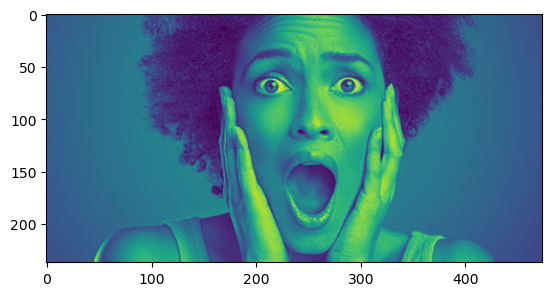

In [13]:
plt.imshow(img_gray)

In [14]:
# loading the classifier into a variable to use in future

haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [15]:
type(haar_cascade)

cv2.CascadeClassifier

In [16]:
# finding the coordinates of a square inside of which
# the face lies as a array of indexes given by the classifier

faces=haar_cascade.detectMultiScale(img_rgb, 1.1, 4)

In [17]:
type(faces)

numpy.ndarray

In [18]:
# iterating through the coordinates to draw a square

for (x, y, w, h) in faces:
    cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (0, 255, 0), 2)


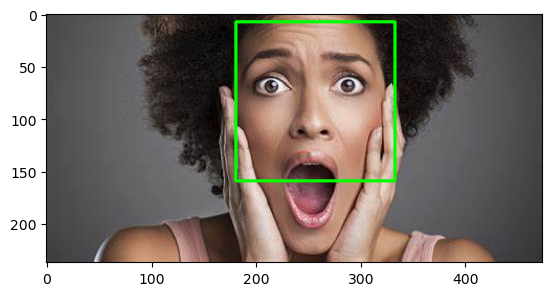

In [19]:
plt.imshow(img_rgb)

---------------

# Putting the text

In [20]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img_rgb,prediction_dict['dominant_emotion'],(50,50),font,2,(255,0,0),2,cv2.LINE_4);

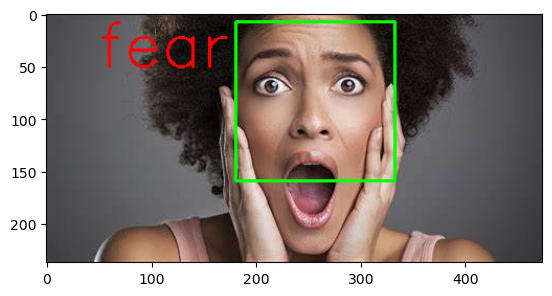

In [21]:
plt.imshow(img_rgb)

----------

------------------------------

***USING THE ABOVE MENTIONED PROCESSES 
WE ARE GOING TO IMPLEMENT THE EMOTION DETECTION PROCESS BY TAKING INPUT FROM THE WEBCAM***

# REAL TIME EMOTION DETECTION

In [22]:
#importing the libraries
import cv2
from deepface import DeepFace


def RealTime_Analyze():
    
    #declaring the model of haarcascade for detecting face in an image or video
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    
    #opeing the camera 
    cam = cv2.VideoCapture(1)
    
    #checking the camera functionality
    if not cam.isOpened():
        cam = cv2.VideoCapture(0)
    if not cam.isOpened():
        raise IOerror("NO camera detected")
        
    while True:
#        -----------------------------------------------------------------------
#                       TAKING INPUT AND FINDING DOMINANT EMOTION
#                      ------------------------------------------- 


#         taking the each frame from the camera as variables named 'frame' and 'ret'
        ret,frame = cam.read()
        
#         analyzing the frames taken as input to get facial features
        result_analyzer1 = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
        
#          As DeepFace.analyze returns a list of dictionary, 
#          we have to extract the dictionary
        result_analyzer = result_analyzer1[0]
        
# ---------------------------------------------------------------------------------------------
#           DETECTING THE FACE AND DRAWING SQUARE AROUND IT
#          ------------------------------------------------

#         changing colour index of frames from BGR to GRAY
    
#         as haarcascade classifier take a gray scaled image
#         to detect the face. 
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
#         locating the coordinates of the squares inside which the face is detected(i.e. x,y,w,h)
#         using detectMultiScale method of haarcascade classifier
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
#         iterating through the coordinates given in faces using for loop
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
    

# ---------------------------------------------------------------------------------------
#         WRITING THE DOMINANT EMOTION ON THE SCREEN
#        ---------------------------------------------

#         LOADING THE FONT
        font = cv2.FONT_HERSHEY_SIMPLEX
        
#         ADDING THE TEXT ON THE SCREEN USING putText FUNCTION OF CV2
        cv2.putText(frame, result_analyzer['dominant_emotion'], (50, 50), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        
# --------------------------------------------------------------------------------------- 
#             SHOWING THE CHANGES ON THE SCREEN
#             ----------------------------------

        cv2.imshow('Original video', frame)
        
#         ADDING A BREAK-STATEMENT TO THE INFINITE LOOP
        if cv2.waitKey(2) & 0xFF == ord('x'):
            cam.release()
            cv2.destroyAllWindows()
            break
            
    
    
    

if __name__ == '__main__':
    RealTime_Analyze()
        

Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.43it/s]
